### Сборный проект. Анализ интернет-магазина «Стримчик».

#### Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

#### Описание данных

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

1. Шаг 1. Открыли файл с данными и изучили общую информацию.


2. Шаг 2. Подготовка данных.

   2.1 Заменили названия столбцов (привели к нижнему регистру)
   
   2.2 Преобразовали данные в нужные типы и обработаем пропуски. 
   
   2.3 Суммарные продажи во всех регионах

3. Анализ количества игр выпущеных по годам.

   3.1 Анализ количества игр выпущеных по годам.
   
   3.2 Анализ продаж по платформам
   
   3.3 Продажи по платформам в актуальный период
   
   3.4 Построение боксплотов по наиболее перспективным платформам
   
   3.5 Связь отзывов и продаж
   
   3.6 Распеределение игр по жанрам.
 
 
4. Портрет пользователя каждого региона


5. Проверка гипотез


6. Вывод

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

## Шаг 1. Открыли файл с данными и изучитли общую информацию

In [3]:
games = pd.read_csv('/datasets/games.csv') #импортируем данные с помощью csv

In [4]:
games.head(10) #Посмотрим первые 10 строк данных.

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
games.info() #Посмотрим первичную информацию о них.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<AxesSubplot:>

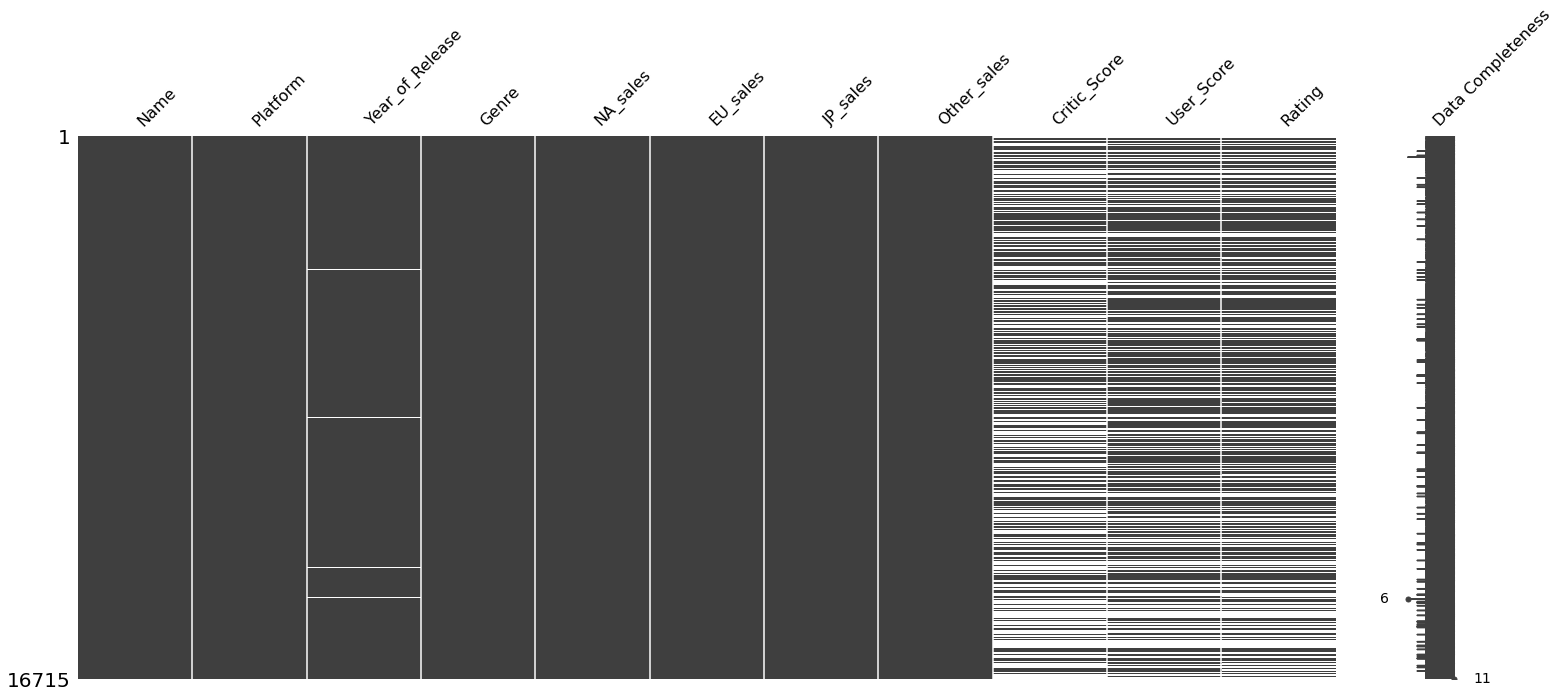

In [7]:
msno.matrix(games, labels=True) #оценим визуально пропуски в данных

В наших данных есть 16715 строк. Датафрейм состоит из 11 колонок. Данные взяты за промежуток 1980 по 2016г. В некоторых из них присутствуют пропуски.
Также присуствует два типа данных "object" и "float64". Есть столбец с годом релиза игры - вещественный тип данных. Нужно будет поменять на целочисленный.

Большое количество пропусков в столбе с оценкой критиков, оценкой пользователей и рейтингом игр.

Также стоит отметить, что в отличие от оценки критиков, в столбец с оценкой пользователей имеет типа данных - object.

Значит, там могут находиться не только цифры. Либо цифры, но которые перенеслись как строка.

В рейтинге есть как Nan, так и буквы, обозначающие рейтинг - соответственно, тип данных - object

## Шаг 2. Подготовьте данные

### Заменим названия столбцов (привели к нижнему регистру)

In [8]:
games.columns = games.columns.str.lower() 

In [9]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразуем данные в нужные типы и обработаем пропуски. 

Проверим данные на колличество явных дубликатов.

In [10]:
games.duplicated().sum()

0

Проверим данные на неявные дубликаты.

In [11]:
games['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [12]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [13]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [14]:
#Код ревьюера
games[games[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Вернемся к пропускам. Всего строк в таблице 16715. Пропусков в столбцах:

In [15]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

У двух игр не указано название и жанр, удалю данные позиции, тк как на результаты исследований это не повлияет

В 269 строках не указан год выпуска игры. Считаю, что заменять пропуски будет некорректно, тк как это может повлиять на результаты. Поэтому удалю их

Пропуски могли появиться из-за того, что пользователь не ввел год выпуска либо по причине того, что год релиза игры неопределен в принципе.

Посмотрим отдельно столбцы user_score - его формат 'object, что очень странно.

In [16]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо пропусков, видим "tbd". Посмотрим, сколько их.

In [17]:
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [18]:
games.query('user_score.isna()') #посмотрим на игры, у котрых нет оценки пользователей

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В данных есть пропуски и "tbd"-значение. Пропуски могли возникнуть:если пользователи не дали оценки, или при загрузке данных.

У более половины игр нет оценок пользователей.

Из нижней части таблице видно, что у игр, где нет оценок пользователей, продажи по регионам равны 0 млн копий.

Удалять такие данные некорректно, тк как копий продано может быть менее 10 тысяч - а это равно 0.00 млн.

У игр, которых было продано мало, отсутсвие значений можно объяснить тем, что пользователи просто не поставили оценки играм. Но у более популярных игр отсутсвие данных приводит к вопросам.

У нас к обработке столбцы critic_score и user_score - заполним пропуски значением -1, потому что пропусков слишком много, и оценка может сильно пострадать если удалить пропуски или заменить средним значением.

In [19]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)

In [20]:
games['user_score'] = games['user_score'].replace('tbd', '-1') #заменим значение 'tbd' на -1, чтобы данные не искозилиись

In [21]:
print('Количество пропусков в столбце critic_score - {}'.format(games['critic_score'].isnull().sum()))
print('Количество пропусков в столбце user_score - {}'.format(games['user_score'].isnull().sum()))

Количество пропусков в столбце critic_score - 0
Количество пропусков в столбце user_score - 0


In [22]:
games['user_score'] = games['user_score'].astype(float) #заменим тип данных

Удалим пропуски в столбцах: 'name','year_of_release', 'genre'

In [23]:
games.dropna(subset=['name','year_of_release', 'genre'], inplace=True)

In [24]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

Столбец year_of_release имеет тип float, заменю данных тип на int

In [25]:
games['year_of_release'] = games['year_of_release'].astype(int)

Рейтинг ставит организация ESRB, поэтому пропуски заменим на "не определен". Здесь пропуски могли появиться по тех причине, либо организация действительно не поставила рейтинг для игры.

In [26]:
games['rating'] = games['rating'].fillna('Не определен')

In [27]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Не определен
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Не определен
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,Не определен
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,Не определен


<AxesSubplot:>

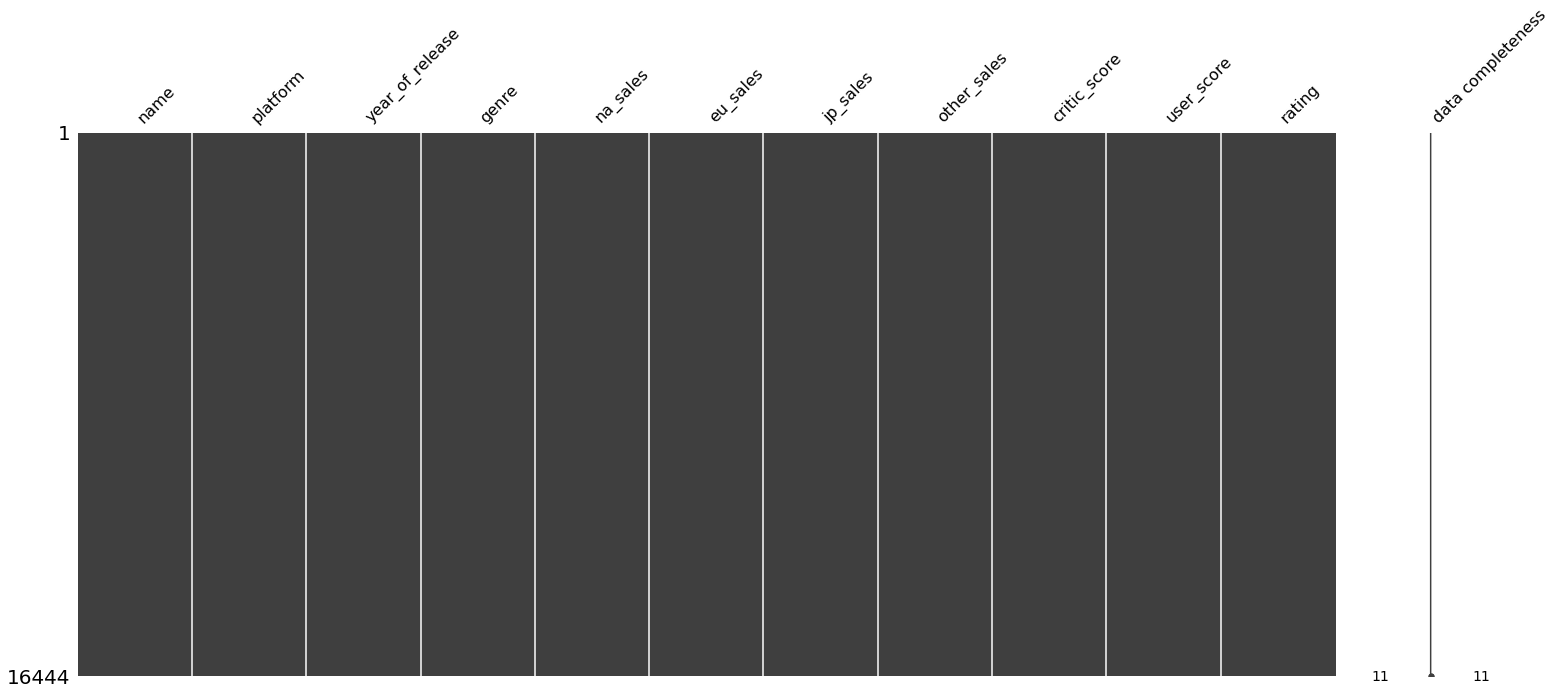

In [28]:
msno.matrix(games, labels=True) #еще раз оценим количество пропусков после всех преобразований

Пропусков нет, с данными можно работать дальше.

### Найдем суммарные продажи во всех регионах и запишим их в отдельный столбец

In [29]:
games['total_sales'] =  games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [30]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,32.979871,2.688081,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,36.302947,4.170124,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,-1.000000,-1.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


Суммарная выручка составила 16444 млн копий. Максимальная 82.54 млн копий.

## Шаг 3. Исследовательский анализ данных

### Анализ количества игр выпущеных по годам.

Сгруппируем данные по году и выведем количество игр, релиз которых был в каждый год.

Text(0, 0.5, 'Сумма')

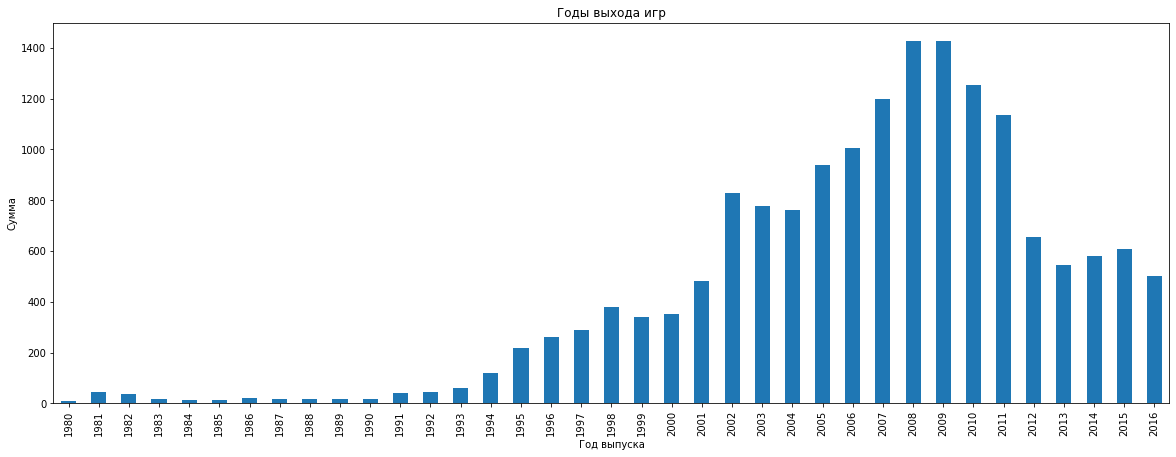

In [31]:
games.groupby('year_of_release')['name'].count().plot(kind='bar', figsize=(20, 7))
plt.title('Годы выхода игр')

plt.xlabel('Год выпуска')

plt.ylabel('Сумма', rotation=90)

Для анализа данных часть игр, которые выпускались 1994 года не важна. Индустрия игр еще была не так популярна. Всего игр выпущенных до 1994 года составляет 365 штук. Это около 2% выборки.

Резкий скачок по количеству игр, выпущенных в год, произошел в 2002 году. Рекордное количество игр было выпущено в 2008-09 годах. После этого начался спад, связанный с развитием мобильных устройств, интеграция соц. сетей в жизнь людей. Это всё привело к тому, что интерес к самим играм упал, соответственно, упало и их производство. 

На графике видно, что левый хвост гистограммы очень узок.

In [32]:
games.query('year_of_release<1994')['name'].count() #колличество игр до 1994 года

365

### Анализ продаж по платформам

In [33]:
platforms = games['platform'].unique() #Создадим список, где будет хранится названия платформ

Сгрупируем платформы с наибольшими суммарными продажами c 1994 года и построим графики изменения продаж по годам.

Text(0, 0.5, 'Продажи')

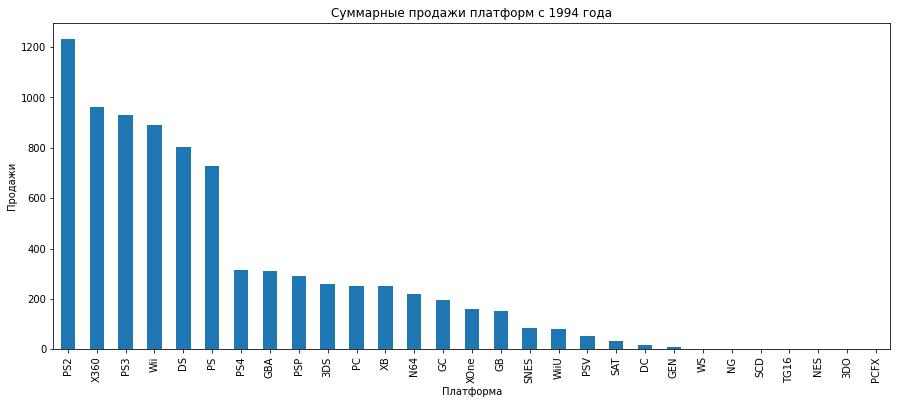

In [34]:
games.query('year_of_release>=1994').groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', 
                                                                                                                figsize=(15,6)
                                                                                                               )
plt.title('Суммарные продажи платформ с 1994 года')

plt.xlabel('Платформа')

plt.ylabel('Продажи', rotation=90)

Из графика можно выделить 5 лидеров, остальные платформы или же мало известны, или расчитаны на определенный регион. ( Возьмем 5 платформ для расчета "активности" платформы.

### Продажи по платформам в актуальный период

До 1994 года выходило слишком мало игр, относительно общей выборки; а также не наблюдалось лидирующих по суммарным продажам платформ. Более того, только за последние 10 лет мы наблюдаем и большое количество игр, и большой выбор платформ, которые могут составить друг-другу конкуренцию. Поскольку последние тенденции показывают лидерство нескольких платформ, а не одной; а также срок устаревания платформы составляет около 10 лет; и данные за 2016 год неполные, нам нужен срез данных с 2006 по 2015 год, с которым мы продолжим пока работать. Так же следует помнить о том, что нам нужны платформы, которые находятся на подъеме, а значит стоит рассматривать период равный примерно половине жизненного цикла. Иначе нам будут мешать платформы, которые набрали большие продажи в прошле годы, но уже на спаде и скоро перестанут выпускаться. Для определения такого периода изучим данные глубже. 

In [35]:
games_actual = games.query('year_of_release >= 2014 & year_of_release <= 2016') #сделаем срез по годам

Составим сводную таблицу, которая проиллюстрирует динамику лидерства платформ по продажам.

In [36]:
platform_active = games_actual.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
platform_active 

year_of_release,2014,2015,2016
platform,,,
3DS,43.76,27.78,15.14
PC,13.28,8.52,5.25
PS3,47.76,16.82,3.60
PS4,100.00,118.90,69.25
PSP,0.24,0.12,NaN
PSV,11.90,6.25,4.25
Wii,3.75,1.14,0.18
WiiU,22.03,16.35,4.60
X360,34.74,11.96,1.52


Таким образом, мы получили срез из 5 платформ, которые будут актуальны в 2017 году.Построим график для этих платформ.

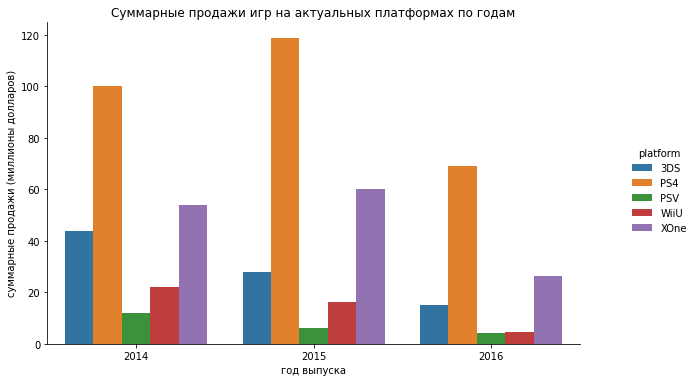

In [37]:
platform_active = (games_actual
                              .loc[(games_actual['platform'].isin(("3DS", "PS4", "PSV", "WiiU", "XOne"))==True) & (
                                  games_actual['year_of_release'].isin(( 2014, 2015, 2016))==True)]
                              .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
                              .reset_index()
                 )
plot = sns.catplot(x='year_of_release', y='total_sales', hue="platform", kind="bar", data=platform_active)
plt.title("Суммарные продажи игр на актуальных платформах по годам", fontsize=12)
plt.xlabel('год выпуска', fontsize=10)
plt.ylabel('суммарные продажи (миллионы долларов)', fontsize=10)
plot.fig.set_size_inches(10,5)

Таким образом, получили потенциально прибыльные в 2017 году платформы: Playstation4, только набирающая обороты и приносящая самый высокий доход от продаж; XOne занимает второе место, 3DS теряет популярность, но еще будет актуальна в 2017г; WiiU, являющаяся преемником Wii, которая тоже была достаточно популярна в своё время, но возможно, не стоит делать на нее упор, тк популярность значительно упала; Playstation4.PlaystationVita, не настолько популярная (что может быть связано с меньшим количеством игр на данной платформе), но также потенциально прибыльная в ближайшие 2-3 года;

При этом наблюдается рост популярности у потребителей игр для Playstation4 и XBoxOne; и снижение спроса на игры на платформах 3DS, PlaystationVita и WiiU, тем не менее, даже они потенциально могут принести достаточно высокий доход до появления аналогов нового поколения.

### Построение боксплотов по наиболее перспективным платформам

Мы выделили наиболее перспективные платформы, которые будем далее анализировать. Оставим в срезе данных только игры, относящиеся к данным платформам.

In [38]:
profitable_platforms = pd.Series(platform_active['platform'].unique())
games_popular = games_actual.loc[games_actual['platform'].isin(profitable_platforms)==True].reset_index(drop=True)
games_popular.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,Не определен,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,Не определен,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,Не определен,7.98


In [39]:
# Создадим таблицу, необходимую для построения боксплотов, исключив ненужные столбцы
name_sale = games_popular.pivot_table(index=['platform', 'name'], values='total_sales', aggfunc='sum').reset_index()
name_sale.head()

,platform,name,total_sales
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Haikyu!! Cross Team Match!,0.04
3,3DS,12-Sai. Honto no Kimochi,0.07
4,3DS,12-Sai. Koisuru Diary,0.05


Построим боксплоты по глобальным продажам каждой игры и разбивкой по платформам.

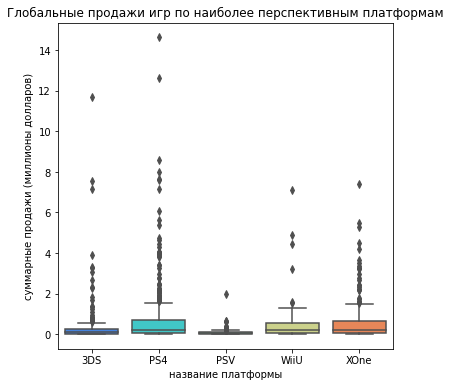

In [40]:
fig = plt.subplots(figsize=(6,6))
plt.title("Глобальные продажи игр по наиболее перспективным платформам")
plot = sns.boxplot(x="platform", y="total_sales", data=name_sale, palette='rainbow')
plt.xlabel('название платформы')
plt.ylabel('суммарные продажи (миллионы долларов)')
plt.show()

Видим, что на каждой из платформ существует большое количество игр, суммарные продажи по которым выбиваются из квартильных значений. В целом, разница в суммарных продажах игр в рамках каждой из платформ очень велико для 3DS и Playstation4; чуть меньше - для WiiU и XBoxOne; и относительно небольшая - для PlaystationVita.

Сравним показатели по наиболее часто встречающимся значениям: для этого нам интересны среднее, медианное и квартильные значения. Построим график в укрупнённом виде, исключив из визуализации выбивающиеся значения.

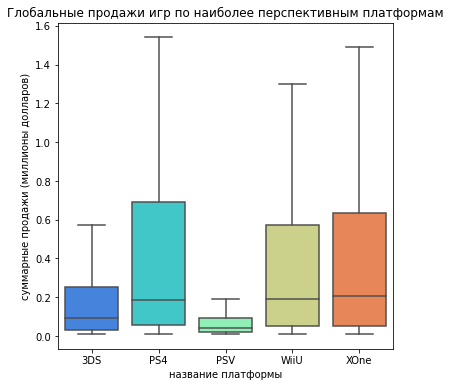

In [41]:
fig = plt.subplots(figsize=(6,6))
plt.title("Глобальные продажи игр по наиболее перспективным платформам")
plot = sns.boxplot(x="platform", y="total_sales", data=name_sale, palette='rainbow', showfliers=False)
plt.xlabel('название платформы')
plt.ylabel('суммарные продажи (миллионы долларов)')
plt.show()

    По всем платформам наблюдается превышение среднего значения над медианным и скос датасетов вправо: для Playstation4 и XBoxOne наиболее сильно, для 3DS и WiiU - чуть меньше, и для PlayStationVita - относительно небольшой. Также видим различия в медианных значениях: игры yf Playstation4 и XBoxOne имеют схожие боксплоты (квартильные, средние и медианные значения), а WiiU характеризуется меньшим значением; затем идёт 3DS и PlayStationVita.

    Это может быть связано с разнобразием игр на ведущих платформах: поскольку платформы Playstation и XBox достаточно давно приобрели популярность среди потребителей, они могут позволить себе выпуск достаточно ранжированного по цене игрового контента, способного найти "своего" потребителя: поэтому их боксплоты шире и растянутее. Wii тоже достаточно старая (в версиях предыдущих поколений), но менее популярная - соответственно разнообразие игр на данной платформе может быть ниже. Что касается PlaystationVita - это консоль с небольшим разнообразием игр, которые, как мы видим по боксплоту, схожи в ценовой категории и по продажам - разброс по данной платформе самый небольшой, и среднее значение не сильно превосходит медианное.

### Связь отзывов и продаж

Рассмотрим самую популярную на текущий момент платформу - PS4. 

Построим диаграмму рассеяния с помощью метода scatter, по оси х - отобразим оценки пользователей по игре, по у - общие продажи данной игры

In [42]:
ps4 = games.query('2014 <= year_of_release <= 2016 and platform == "PS4" and user_score > 0') #найдем коэффициент корреляции, чтобы определить степень линейной зависимости между этими двумя переменными

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

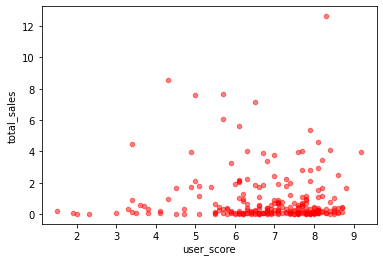

In [43]:
ps4.plot.scatter(x='user_score', y='total_sales', c='red', alpha=0.5)

Явного влияния оценки пользователей на продажи нет. Стоит сказать, что, действительно, зона где оценка игр более 6 - намного насыщеннее и в этой зоне больше игр находится за рамками средних продаж.

Посмотрим диаграмму рассеяния на оценку критиков.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

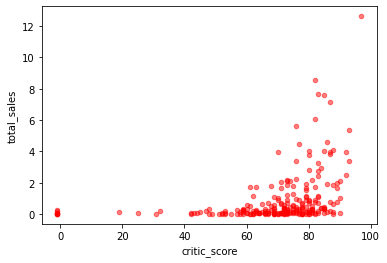

In [44]:
ps4.plot.scatter(x='critic_score', y='total_sales', c='red', alpha=0.5)

In [45]:
ps4['critic_score'].corr(ps4['total_sales']) #найдем коэффициент корреляции, чтобы определить степень линейной зависимости между этими двумя переменными

0.33982751788998095

Исходя из данных видим, что на платформе PS4 оценки пользователей не влияет на продажи игр. Пользователи скорее следят за мнением критиков и принимают решения, покупать игру или нет.

Оценка критиков более весомая и она в большей степени влияет на продажи игр.

На последнем графике уже видна закономерность, что от оценки в 60 баллов - чем больше оценка критика - тем больше игр продается.

Коэфициент корреляции равен 0,33, что показывается наличие влияния, но показатель мал, чтобы говорить, что связь сильная

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами среди попульрных платформ.

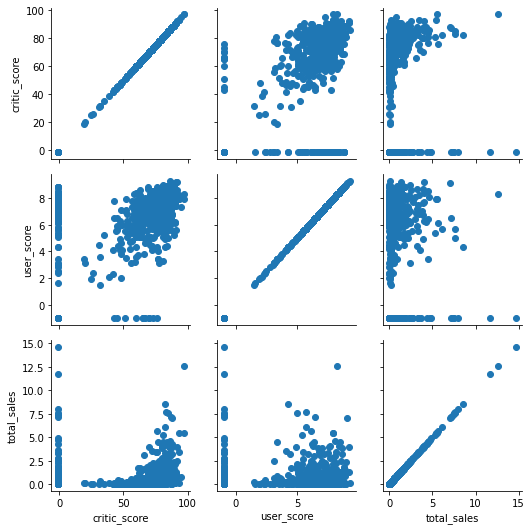

In [46]:
Scaterplots = sns.PairGrid(games_popular[['critic_score', 'user_score', 'total_sales']])
Scaterplots.map(plt.scatter)
plt.show()

In [47]:
games_popular_сorrelation = games_popular.corr()
games_popular_сorrelation

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.122385,-0.092258,-0.079418,-0.097252,0.008443,0.003926,-0.121079
na_sales,-0.122385,1.000000,0.747839,0.277714,0.844077,0.271333,0.181079,0.916670
eu_sales,-0.092258,0.747839,1.000000,0.196863,0.937592,0.250348,0.165688,0.917534
jp_sales,-0.079418,0.277714,0.196863,1.000000,0.170470,-0.041511,-0.047792,0.431870
other_sales,-0.097252,0.844077,0.937592,0.170470,1.000000,0.254779,0.169083,0.933378
critic_score,0.008443,0.271333,0.250348,-0.041511,0.254779,1.000000,0.876080,0.248825
user_score,0.003926,0.181079,0.165688,-0.047792,0.169083,0.876080,1.000000,0.161173
total_sales,-0.121079,0.916670,0.917534,0.431870,0.933378,0.248825,0.161173,1.000000


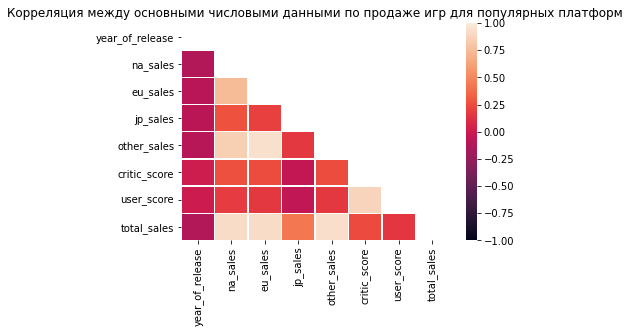

In [48]:
fig, ax = plt.subplots()
plt.title("Корреляция между основными числовыми данными по продаже игр для популярных платформ")
mask = np.triu(np.ones_like(games_popular_сorrelation, dtype=bool))
sns.heatmap(games_popular_сorrelation, vmin=-1, vmax=1, linewidths=.3, mask=mask, ax=ax)
plt.show()

Коэффициент корреляции между Оценкой критиков и Совокупными продажами составил 0,24 (по региональным продажам этот коэффициент примерно схож и близок к 0,008-0,27; исключая Японию), что говорит о небольшой зависимости между этими показателями. Этот же вывод мы можем сделать из диаграммы рассеяния: игры с низкими оценками критиков практически не продаются, в то время как игры с высокими оценками имеют больше продаж. С одной стороны, это может быть связано с тем, что люди обращают внимание на оценку игры, прежде чем покупают её (но корреляция невысокая, соответственно, это не ключевой показатель). С другой стороны, возможно, критиками оцениваются не все игры, а наиболее популярные у покупателей.

Коэффициент корреляции между Оценкой покупателей и Совокупными продажами составил 0,16, что говорит об отсутствии зависимости между этими показателями. Возможно, это связано с тем, что потребитель сначала покупает игру, а затем, поиграв, ставит ей оценку, исходя из субъективного впечатления. Таким образом, одна и та же игра может оставить как хорошее, так и плохое впечатление - в зависимости от индивидуальных предпочтений. 

### Распеределение игр по жанрам.

Построим график распределения по жанрам

<AxesSubplot:xlabel='genre'>

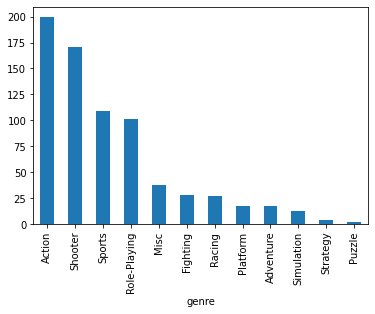

In [49]:
games.query('2014<=year_of_release<=2016').groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')

Самые популярные жанры - это Action, Shooter. Самый непопулярный жанр - Puzzle. Возможно, популярные игры в этих жанрах тратят больший бюджет на разработку, маркетинг, что приносит положительную динамику в продажах.

Построим боксплоты для более детальной наглядности

(0.0, 4.0)

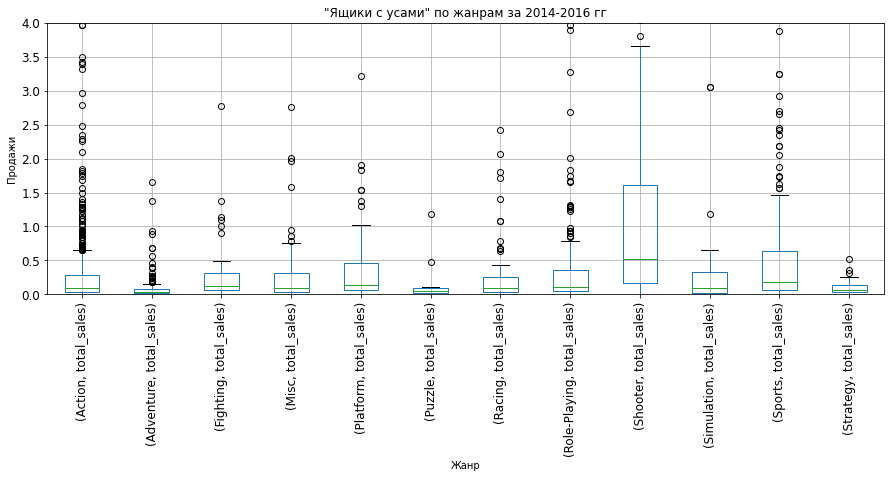

In [50]:
games.query('2014<=year_of_release<=2016').groupby('genre').boxplot(column='total_sales',
                                                                       subplots=False,
                                                                       rot=90, 
                                                                       fontsize=12, 
                                                                       figsize=(15,5))

plt.title('"Ящики с усами" по жанрам за 2014-2016 гг')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.ylim(0,4)

Распределение выпускаемых игр по жанрам отличается между собой.

Например, видна разница между шутерами и экшн играми:

У шутеров 75% игр в этом жанре были проданы в размере 1,6 млн копий В то время как у экшн игр 75% игр лежит в диапазоне продаж до ~300 тыс копий. Но не смотря на это экшн - самый продаваемый жанр.

Также стоит посмотреть на количество игр в жанре

In [51]:
games.query('2014<=year_of_release<=2016 and genre=="Action"')['genre'].agg(['count'])

count    619
Name: genre, dtype: int64

In [52]:
games.query('2014<=year_of_release<=2016 and genre=="Shooter"')['genre'].agg(['count'])

count    128
Name: genre, dtype: int64

За 2014-2016 годы экшн игр было выпущено 619 штук, в то время как шутеров - 128. Почти в 5 раз меньше.
Но из столбчатой диаграммы видно, что шутеры и экшн игры по продаваемости находятся рядом.

Значит, шутеры при их небольшом количестве продавались намного эффетивнее.

Наиболее прибыльные игры - это шутеры. Они становятся очень популярные

Таким образом можно сделать вывод:

с 1994 года количество выпускаемых игр стало стремительно расти. В 2007-2008 годах был достигнут пик продаж игр на приставки
Жизненный цикл платформы составляет около 10 лет, через каждые пять лет на рынок выхохит новая платформа
Пользователи при покупке игр берут во внимание оценки критиков, что влияет на продажи.
Наиболее популярный жанр - action, но наиболее прибыльный (количество-продажи) shooter. При небольшом количестве игр - продажи схожи с экшн играми. Наименее популярный жанр - puzzle

## Портрет пользователя каждого региона

Определим самые популярные платформы ( за период 2014 - 2016г) по регионам и оценим их на диаграмме

In [53]:
games_sales = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [54]:
def graph_pie(data, title): #Для построение диаграмм напишем функцию
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,8))
    palette = sns.color_palette('pastel')[ 0:5 ]
    fig.suptitle(title)
    ax1.pie(data['na_sales'], labels = data.index, autopct='%1.1f%%', colors = palette, normalize=True)
    ax1.set_title('Северная Америка')
    ax2.pie(data['eu_sales'], labels = data.index, autopct='%1.1f%%', colors = palette, normalize=True)
    ax2.set_title('Европа')
    ax3.pie(data['jp_sales'], labels = data.index, autopct='%1.1f%%', colors = palette, normalize=True)
    ax3.set_title('Япония')
    ax4.pie(data['other_sales'], labels = data.index, autopct='%1.1f%%', colors = palette, normalize=True)
    ax4.set_title('Другие регионы')
    fig.tight_layout()

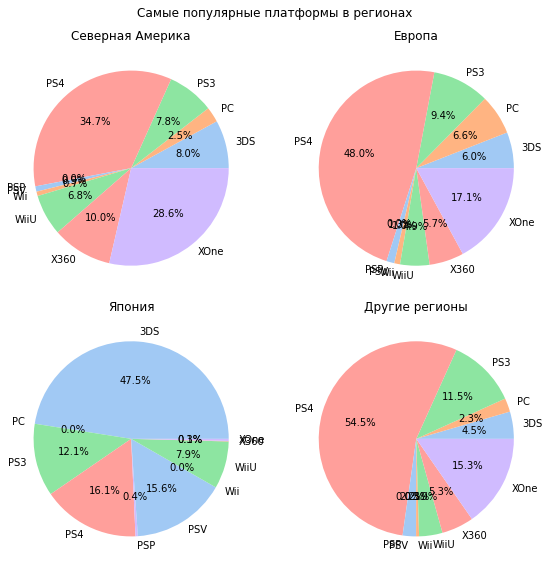

In [55]:
platform_region_sales = games_actual.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')
graph_pie(platform_region_sales, 'Самые популярные платформы в регионах')

Из диаграмм можем сделать вывод: самые популярные платформы в Северной Америке это PS4, XOne, X360  В Европе картина примерна такая же, небольшое отличие в процентном соотношении. Схожесть вкусов пользователей, возможно, обусловлена с тем, что менталитет и культура в большей степени схожи. Существенную разницу имеет распредление платформ в Японии, тут картина совершенно другая:  3DS( почти половина рынка 47,5%), PS4  PSV. Предпочтения в платформах в других регионах больше походят на предпочтения Европы с еще несколько большей популярностью PS4.

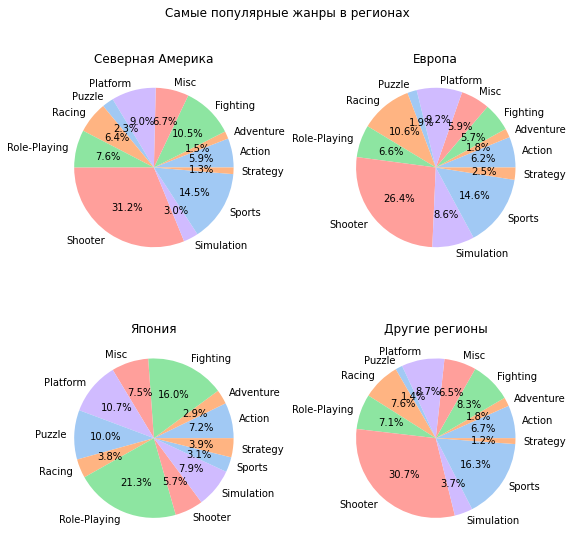

In [56]:
genre_region_sales=games_actual.pivot_table(index='genre',
                                               values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])
graph_pie(genre_region_sales, 'Самые популярные жанры в регионах')

Распредение предпочтений пользователей согласно диаграммам продаж по жанрам во всех регионах кроме Японии похожи. Лидируют шутеры затем игры в категории Platform.

В японском регионе портрет пользователя совсем другой. Первое место по предпочтениям Role-Playing и Platform.

По рейтингам ESRB во всех регионах (опять же кроме Японии) больше трети продаж происходят в категории M («Для взрослых»: Материалы игры не подходящие для лиц младше 17 лет) В Японском регионе эта доля снижена до 17%. Далее по распространению "детские" - категории E и E10+. 

Исходя из это можно смело утверждать, что пользователи Японии существенно отличатся от пользователей Северной Америки и Европы, это возможно, зависит от культуры и менталитета.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Чтобы сравнивать средние двух выборок необходимо, чтобы средние их выборок были нормально распределены вокруг среднего ген совокупности.

Сформулируем нулевую гипотезу H0: Средние двух генеральных совокупностей равны между собой.

Альтернативная гипотеза H1: Средние двух генераальных совокупностей не равны между собой.

In [58]:
xone_user_scores = games.query('2014 <= year_of_release <= 2016 and platform == "XOne" and user_score.notna()')['user_score']
pc_user_scores = games.query('2014 <= year_of_release <= 2016 and platform == "PC" and user_score.notna()')['user_score']

alpha = 0.05

results = st.ttest_ind(xone_user_scores, pc_user_scores)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.2718222107871509
Не получилось отвергнуть нулевую гипотезу


pvalue (27%) больше уровня значимости (5%). Это означает, что вероятность получить одинаковые средние из двух выборок весома.

в 27 из 100 случаев можем получить одинаковые средние для пользовательских рейтингов у данных платформ.

Поэтому на имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу

Проверим средние данных этих выборок:

In [59]:
games.query('2014<=year_of_release<=2016 and platform=="XOne" and user_score.isna() == False')['user_score'].mean()

4.496052631578947

In [60]:
games.query('2014<=year_of_release<=2016 and platform=="PC" and user_score.isna() == False')['user_score'].mean()

4.896688741721853

Действительно, средние значение пользовательских оценок очень близки между собой.
Поэтому справедливо не отвергать нулевую гипотезу.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Ho = средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1 = средние пользовательские рейтинги жанров Action и Sports разные.

In [61]:
action_genre_games = games.query( '2014<=year_of_release<=2016 and genre=="Action" and user_score.isna() == False')['user_score'] 
sports_genre_games = games.query( '2014<=year_of_release<=2016 and genre=="Sports" and user_score.isna() == False')['user_score']

alpha=0.05

results = st.ttest_ind(action_genre_games, sports_genre_games)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.00046659782032851705
Отвергаем нулевую гипотезу


p-value в разы меньше уровня стат значимости (5%).

ТАким образом, при ~0 случаях из 100 мы можем получить одинаковые средние пользовательские рейтинги. Уровень стат значимости задан на уровне 5 случаев. Значит, при всех значениях, что меньше 5 - мы не принимаем первую гипотезу, и может принять гипотезу о том, что, действително, средние пользовательские рейтинги могут быть разными

Сравним средние значения этих выборок:

In [62]:
games.query( '2014<=year_of_release<=2016 and genre=="Action" and user_score.isna() == False')['user_score'].mean()

2.723586429725364

In [63]:
games.query( '2014<=year_of_release<=2016 and genre=="Sports" and user_score.isna() == False')['user_score'].mean()

3.91055900621118

вероятность получить значение за пределелами 0,05 крайне мала(вероятность того, что полученное среднее будет сильно отличаться от среднего выборки первой совокупности). Следовательно, много вероятно получить такое значение, которое будет близко к среднему первой совокупности.

Поэтому мы отвергли гипотезу о том, что средние рейтинги разные. Ведь даже если посмотреть на средние значения этих выборок, то они отличаются всего на 0,1 единицы, что является малой разницей между показателями.

## Вывод

Импортировали библиотеки, открыли файл с данными и изучили общее представление о данных. 

В наших данных есть 16715 строк. Датафрейм состоит из 11 колонок. Данные взяты за промежуток 1980 по 2016г. В некоторых из них присутствуют пропуски, которые обработали. Также присуствует два типа данных "object" и "float64", привели форматы данных к их виду. Пропущенные значения обработали. Пропуски могли появиться из-за того, что пользователи не давали корректную информацию или при загрузке данных.

В результате анализа выяснили, что суммарная выручка составила 16444 млн копий. Максимальная 82.54 млн копий.
Для анализа данных часть игр, которые выпускались 1994 года не важна. Индустрия игр еще была не так популярна. Всего игр выпущенных до 1994 года составляет 365 штук. Это около 2% выборки.
Резкий скачок по количеству игр, выпущенных в год, произошел в 2002 году. Рекордное количество игр было выпущено в 2008-09 годах. После этого начался спад, связанный с развитием мобильных устройств, интеграция соц. сетей в жизнь людей. Это всё привело к тому, что интерес к самим играм упал, соответственно, упало и их производство. 
Можно выделить 5 лидеров, остальные платформы или же мало известны, или расчитаны на определенный регион.  PS2 - 1233.56, X360 - 961.24 , PS3 - 931.34 , Wii - 891.18 , DS - 802.76 , PS - 727.58 , PS4 - 314.14. За последние 10 лет мы наблюдаем и большое количество игр, и большой выбор платформ, которые могут составить друг-другу конкуренцию. Поскольку последние тенденции показывают лидерство нескольких платформ, а не одной; а также срок устаревания платформы составляет около 10 лет.

Таким образом, потенциально прибыльные в 2017 году платформы: 3DS, которая уже несколько лет пользуется популярностью у потребителей игр; Playstation4, только набирающая обороты и приносящая самый высокий доход от продаж; PlaystationVita, не настолько популярная (что может быть связано с меньшим количеством игр на данной платформе), но также потенциально прибыльная в ближайшие 2-3 года; WiiU, являющаяся преемником Wii, которая тоже была достаточно популярна в своё время; а также XBoxOne от компании Microsoft, способная составить конкуренцию Playstation4.

При этом наблюдается рост популярности у потребителей игр для Playstation4 и XBoxOne; и снижение спроса на игры на платформах 3DS, PlaystationVita и WiiU, тем не менее, даже они потенциально могут принести достаточно высокий доход до появления аналогов нового поколения.Это может быть связано с разнообразием игр на ведущих платформах: поскольку платформы Playstation и XBox достаточно давно приобрели популярность среди потребителей, они могут позволить себе выпуск достаточно ранжированного по цене игрового контента, способного найти "своего" потребителя: поэтому их боксплоты шире и растянутее. Wii тоже достаточно старая (в версиях предыдущих поколений), но менее популярная - соответственно разнообразие игр на данной платформе может быть ниже. Что касается PlaystationVita - это консоль с небольшим разнообразием игр, которые, как мы видим по боксплоту, схожи в ценовой категории и по продажам - разброс по данной платформе самый небольшой, и среднее значение не сильно превосходит медианное.

Исходя из данных видим, что на платформе PS4 оценки пользователей не влияет на продажи игр. Пользователи скорее следят за мнением критиков и принимают решения, покупать игру или нет. Оценка критиков более весомая и она в большей степени влияет на продажи игр. Коэфициент корреляции равен 0,21, что показывается наличие влияния, но показатель мал, чтобы говорить, что связь сильная.

Самые популярные жанры - это Action, Shooter. Самый непопулярный жанр - Puzzle. Возможно, популярные игры в этих жанрах тратят больший бюджет на разработку, маркетинг, что приносит положительную динамику в продажах. Распределение выпускаемых игр по жанрам отличается между собой. Например, видна разница между шутерами и экшн играми: У шутеров 75% игр в этом жанре были проданы в размере 1,6 млн копий В то время как у экшн игр 75% игр лежит в диапазоне продаж до ~300 тыс копий. Но не смотря на это экшн - самый продаваемый жанр.

с 1994 года количество выпускаемых игр стало стремительно расти. В 2007-2008 годах был достигнут пик продаж игр на приставки
Самые популярные платформы в Северной Америке это PS4, XOne, X360. В Европе картина примерна такая же. Схожесть вкусов пользователей, возможно, обусловлена с тем, что менталитет и культура в большей степени схожи. Существенную разницу имеет распределение платформ в Японии, тут картина совершенно другая: 3DS( почти половина рынка 47,5%), PS4  PSV. Предпочтения в платформах в других регионах больше походят на предпочтения Европы с еще несколько большей популярность PS4.
Распределение предпочтений пользователей согласно диаграммам продаж по жанрам во всех регионах кроме Японии похожи, это возможно, зависит от культуры и менталитета.

Проверили гипотезы

В результате проверки не отвергли гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Так же отвергли гипотезу о том, что средние пользовательских оценок для жанров Action и Sports одинаковы в пользу гипотезы, что они разные